##### Here, data visualization is done with the "WORD-CLOUD".

In [15]:
# Importing dependencies

import pandas as pd
import numpy as np
from PIL import Image                    # converting images into arrays
from matplotlib import pyplot as plt
%matplotlib inline 

## Word Clouds

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.


In [4]:
# Importing required library

from wordcloud import WordCloud, STOPWORDS

In [5]:
# Creating the object

alice_novel = open('alice_novel.txt', 'r').read()

In [6]:
# Creating "STOPWORDS";    'set' to remove any redundant stopwords

stopwords = set(STOPWORDS)

Create a word cloud object and generate a word cloud. For simplicity, let's generate a word cloud using only the first 2000 words in the novel.

In [13]:
# Creating the word cloud object

alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)



# Generating the word cloud

alice_wc.generate(alice_novel)

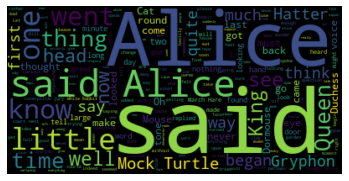

In [16]:
# Visualizing the cloud

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

So in the first 2000 words in the novel, the most common words are Alice, said, little, Queen, and so on.

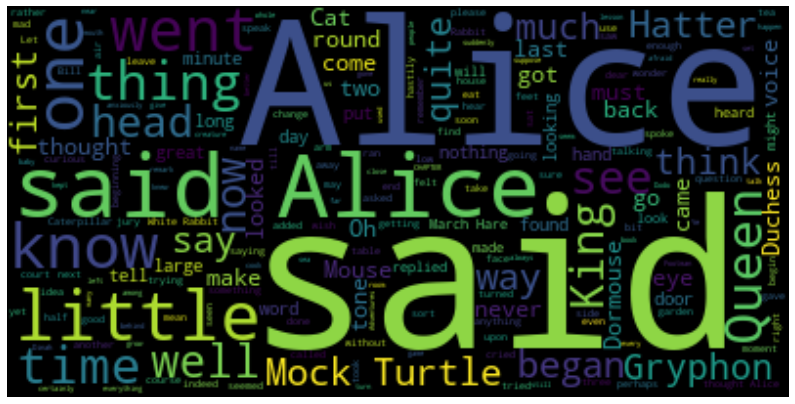

In [17]:
# Increasing the size of the cloud

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# Displaying the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

However, <b>"said"</b> isn't really an informative word. So let's add it to our stopwords and re-generate the cloud,

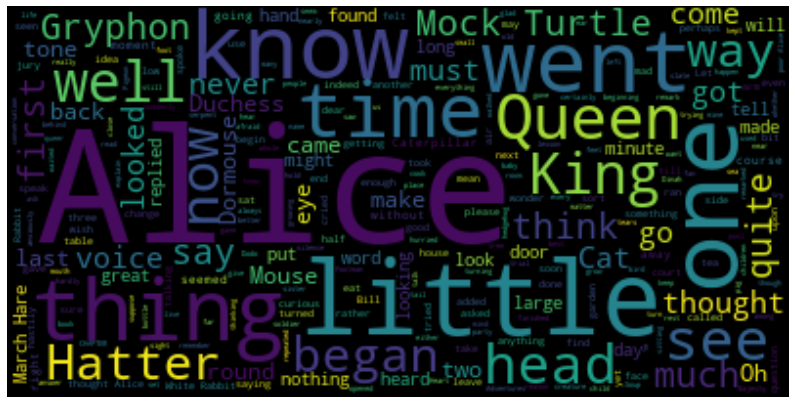

In [18]:
# Adding any further 'STOPWORD'

stopwords.add('said') 

# Re-generating the word cloud

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Superimposing the words onto a mask of any shape :

In [19]:
# Saving it to "ALICE-MASK"

alice_mask = np.array(Image.open('alice_mask.png'))

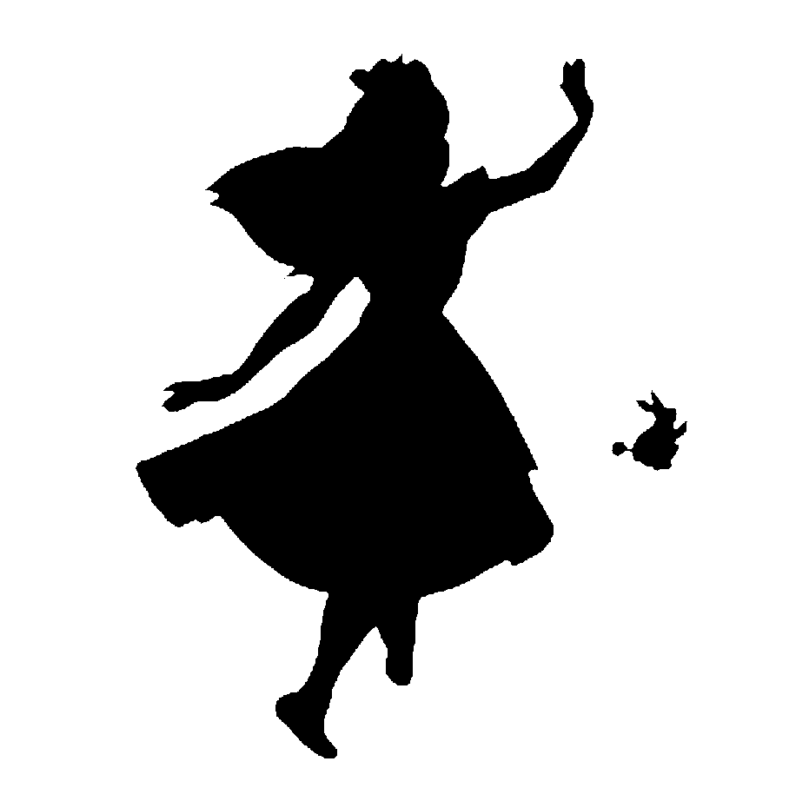

In [20]:
# Visualizing the mask

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

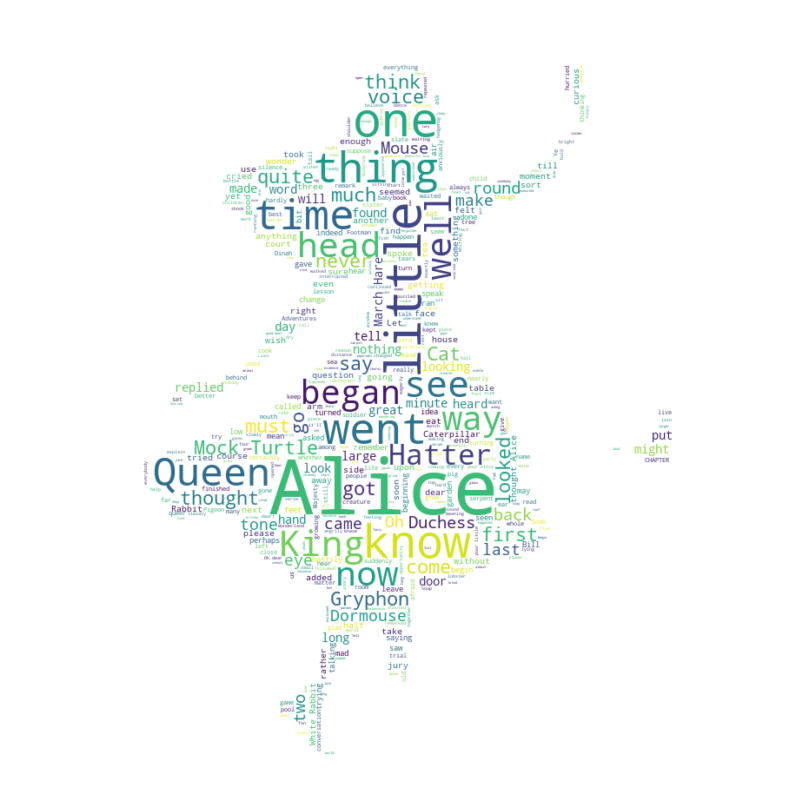

In [21]:
# Performing the above same operation but this time with "MASKING"

alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Working on a Dataset

In [25]:
# Loading the data

df = pd.read_excel("Canada Data.xlsx", sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [27]:
# Cleaning the data


# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df.set_index('Country', inplace=True)

# add total column
df['Total'] = df.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))


In [28]:
# Finding the total immigration over the given years 

total_immigration = df['Total'].sum()
total_immigration

6409153

Using countries with single-word names, let's duplicate each country's name based on how much they contribute to the total immigration.

In [29]:
# Function to generate "WORD-STRING"

max_words = 90
word_string = ''
for country in df.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     


            
# Displaying the generated text

word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

We are not dealing with any stopwords here, so there is no need to pass them when creating the word cloud.

In [30]:
# Creating and Generating the word cloud

wordcloud = WordCloud(background_color='white').generate(word_string)


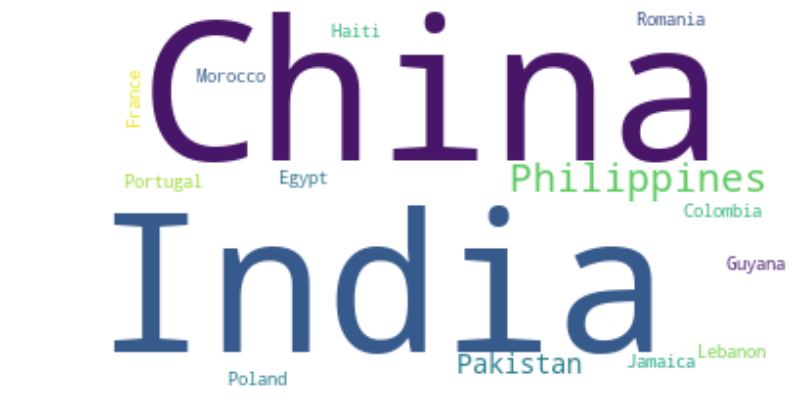

In [31]:
# Displaying the cloud

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

According to the above word cloud, it looks like the majority of the people who immigrated came from one of 15 countries that are displayed by the word cloud.